Import required libaries

In [22]:
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt

Then we insert all the required connection properties

In [23]:
conn = pyodbc.connect('Driver={SQL Server};' # This is what server type we are connecting to
                      'Server=KATHERINE\SERVER1;' # This is the location and name of the server, same as what we use to connect using SSMS
                      'Database=AdventureWorks2019;' # This is which database we are connecting to within the selected server
                      'Trusted_Connection=yes;') # This allows us to forgo entering a trusted key or password because we are the admin of this computer and the...
                    # ... database has been configured to allow this user when we set it up. 

Now we create the cursor

In [24]:
cursor = conn.cursor()

Here we define what query we want executed in the database

In [25]:
query = 'SELECT ROUND(MAX(SalesYTD), 0) AS max_sales, CountryRegionCode FROM [Sales].[SalesTerritory] GROUP BY CountryRegionCode ORDER BY max_sales DESC'
query2 = "SELECT Name AS regions, ROUND (SalesYTD,0) AS sales FROM [Sales]. [SalesTerritory] WHERE CountryRegionCode = 'US';"

Here we assign the resulting table returned from the database as a variable 'salesdata'. 
This is also where our connection actually runs using the defined properties and query above

In [26]:
salesdata = pd.read_sql(query, conn)
regionsales = pd.read_sql(query2, conn)


C:\Users\hajir\AppData\Local\Temp\ipykernel_9108\3308502506.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  salesdata = pd.read_sql(query, conn)
C:\Users\hajir\AppData\Local\Temp\ipykernel_9108\3308502506.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  regionsales = pd.read_sql(query2, conn)


Let's get a preview of what our data looks like:

In [27]:
print(salesdata.head())
print(regionsales.head())

    max_sales CountryRegionCode
0  10510854.0                US
1   6771829.0                CA
2   5977815.0                AU
3   5012905.0                GB
4   4772398.0                FR
     regions       sales
0  Northwest   7887187.0
1  Northeast   2402177.0
2    Central   3072175.0
3  Southwest  10510854.0
4  Southeast   2538667.0


Lastly i create a scatter plot using two of the fields returned from the database

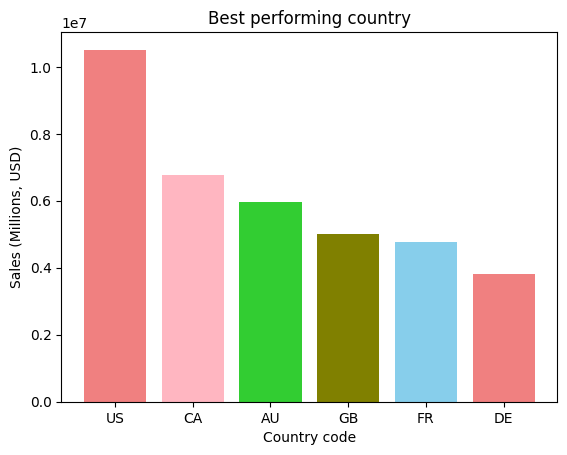

In [28]:
# Bar chart to show the best sales performing country 
x=['1','2','3','4','5', '6']
colors = ['lightcoral','lightpink', 'limegreen', 'olive', 'skyblue',]

plt.bar(salesdata.CountryRegionCode, salesdata.max_sales, color = colors)
plt.title('Best performing country')
plt.ylabel ('Sales (Millions, USD)')
plt.xlabel('Country code')

# Show the data in a chart
plt.show()

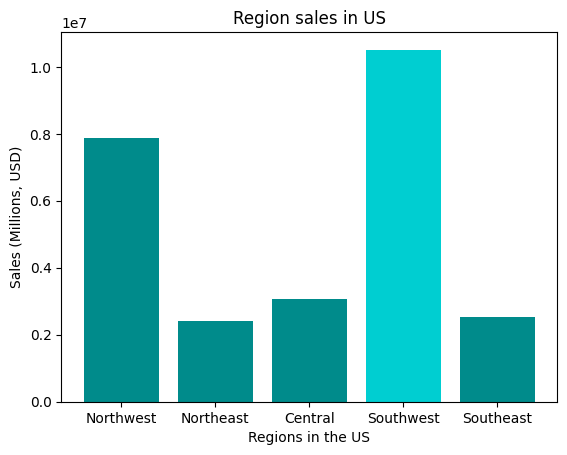

In [29]:
#Barchart to show the region with the highest amount of sales in the US
x=['1','2','3','4','5']
colors = ['darkcyan','darkcyan', 'darkcyan', 'darkturquoise', 'darkcyan']
plt.bar(regionsales.regions,regionsales.sales, color = colors)
plt.title('Region sales in US')
plt.ylabel ('Sales (Millions, USD)')
plt.xlabel('Regions in the US')
plt.show()

Now you can reverse engineer the code I have shown you above to create your own projects